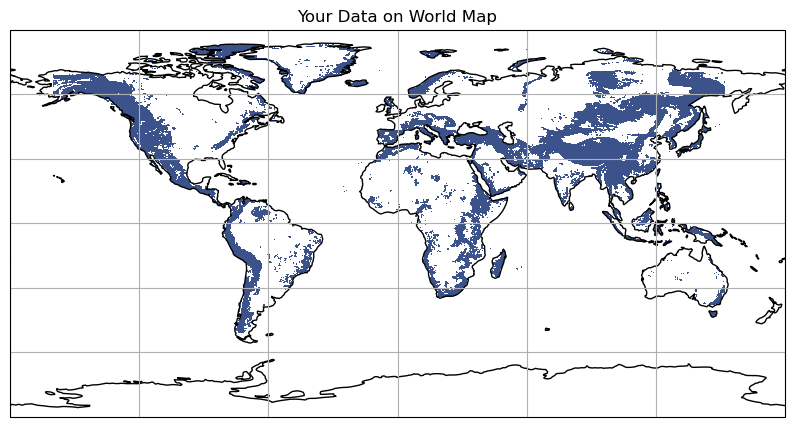

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Load the NetCDF file
dataset = xr.open_dataset('../output/mt_dis.nc')

# Extract the necessary variables (e.g., latitude, longitude, data)
lat = dataset['lat']
lon = dataset['lon']
data = dataset['Band1']  # Replace 'your_variable' with the variable name from your NetCDF file

# Create a larger figure and subplot with Plate Carrée (Equirectangular) projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data on the world map using contourf
contour_plot = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), levels=100)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Set the plot extent to cover the entire world
ax.set_global()

# Set plot title and labels
ax.set_title('Your Data on World Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a colorbar for the contour plot
#cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical', shrink=0.7)
#cbar.set_label('Your Data Units')  # Replace 'Your Data Units' with appropriate units for your data

# Show the plot
plt.show()


In [10]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the netCDF file
mt_dis = xr.open_dataset('../output/mt_dis.nc')
mt_dis

<xarray.Dataset>
Dimensions:  (lat: 1345, lon: 3119)
Coordinates:
  * lat      (lat) float64 -50.89 -50.79 -50.69 -50.59 ... 83.31 83.41 83.51
  * lon      (lon) float64 -159.8 -159.7 -159.6 -159.5 ... 151.8 151.9 152.0
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:           Area
    GDAL_STATISTICS_COVARIANCES:  0
    GDAL_STATISTICS_MAXIMUM:      1
    GDAL_STATISTICS_MEAN:         1
    GDAL_STATISTICS_MINIMUM:      1
    GDAL_STATISTICS_SKIPFACTORX:  1
    GDAL_STATISTICS_SKIPFACTORY:  1
    GDAL_STATISTICS_STDDEV:       0
    Conventions:                  CF-1.5
    GDAL:                         GDAL 3.7.0, released 2023/05/02
    history:                      Sun Jul 30 15:23:42 2023: GDAL CreateCopy( ...

In [11]:
# Load the netCDF file
year = '2019'
wettas = xr.open_dataset('../data/wettasmin_W5E5v2.0_'+year+'.nc')
wettas

<xarray.Dataset>
Dimensions:          (lon: 720, lat: 360, time: 365)
Coordinates:
  * lon              (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * lat              (lat) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * time             (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
Data variables:
    wet_temperature  (time, lat, lon) float32 ...

In [14]:
import xarray as xr

# Load the first NetCDF file with data variable 'wet_temperature'
dataset_1 = wettas
wet_temperature = dataset_1['wet_temperature']

# Load the second NetCDF file with lat and lon coordinates
dataset_2 = mt_dis
lat_mask = dataset_2['lat']
lon_mask = dataset_2['lon']

# Create boolean masks to identify indices outside the lat and lon intersection
lat_indices = np.isin(dataset_1['lat'].values, lat_mask.values)
lon_indices = np.isin(dataset_1['lon'].values, lon_mask.values)

# Set values outside the intersection to NaN
masked_wet_temperature = np.where(lat_indices[:, None] & lon_indices, wet_temperature, np.nan)

# Create a new DataArray with the masked 'wet_temperature' variable
masked_wet_temperature_da = xr.DataArray(
    data=masked_wet_temperature,
    coords={'lat': dataset_1['lat'], 'lon': dataset_1['lon'], 'time': dataset_1['time']},
    dims=['lat', 'lon', 'time']
)


# Save the masked dataset to a new NetCDF file
masked_dataset.to_netcdf('../output/masked_wettas.nc')


ValueError: conflicting sizes for dimension 'lat': length 365 on the data but length 360 on coordinate 'lat'

In [2]:
import xarray as xr
# Load the netCDF file
dataset = xr.open_dataset('../output/masked_wettas.nc')
dataset

<xarray.Dataset>
Dimensions:          (time: 365, lat: 1345, lon: 3119)
Coordinates:
  * time             (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * lat              (lat) float64 -50.89 -50.79 -50.69 ... 83.31 83.41 83.51
  * lon              (lon) float64 -159.8 -159.7 -159.6 ... 151.8 151.9 152.0
Data variables:
    wet_temperature  (time, lat, lon) float32 ...

In [1]:
import xarray as xr

# Load the original NetCDF file
#dataset = xr.open_dataset('path/to/your/original_netcdf_file.nc')
dataset = xr.open_dataset('../data/wettasmin_W5E5v2.0_2019.nc')

# Specify the target resolution (e.g., 0.5 degrees)
target_resolution = 3

# Resample the data to the target resolution using xarray.interp
resampled_dataset = dataset.interp(lat=range(int(min(dataset['lat'])), int(max(dataset['lat'])) + 1, target_resolution),
                                  lon=range(int(min(dataset['lon'])), int(max(dataset['lon'])) + 1, target_resolution),
                                  method='nearest')

# Save the resampled dataset to a new NetCDF file
resampled_dataset.to_netcdf('../output/wettasmin_W5E5v2.0_2019_low.nc')


In [4]:
resampled_dataset

<xarray.Dataset>
Dimensions:          (time: 365, lat: 134, lon: 312)
Coordinates:
  * time             (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * lat              (lat) int64 -50 -49 -48 -47 -46 -45 ... 78 79 80 81 82 83
  * lon              (lon) int64 -159 -158 -157 -156 -155 ... 149 150 151 152
Data variables:
    wet_temperature  (time, lat, lon) float32 5.435 5.255 ... -30.76 -30.53

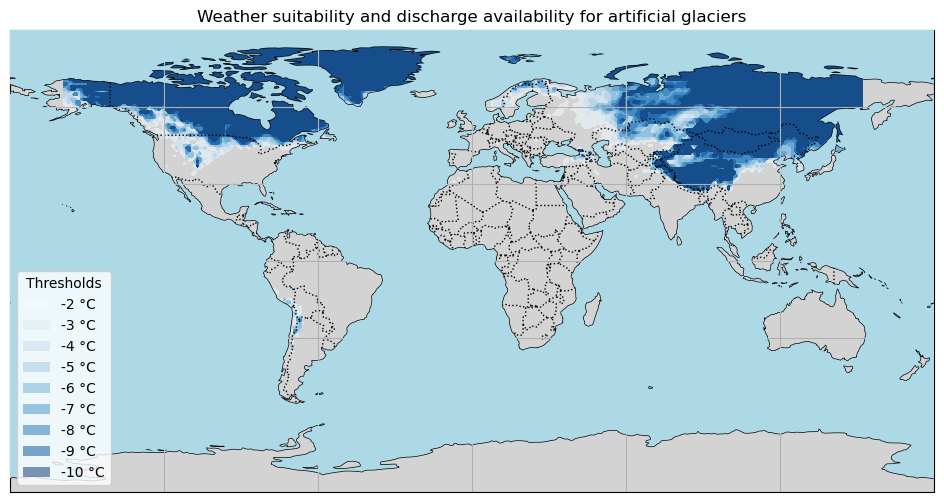

In [6]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the netCDF file
year = '2019'
#dataset = xr.open_dataset('../data/wettasmin_W5E5v2.0_'+year+'.nc')
dataset = resampled_dataset
var = 'wet_temperature'

# Set the window size
window_size = 60

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset[var]

# Filter the dataset to the year 2001
year_dataset = dataset.sel(time=year)[var]

# Define the threshold range
thresholds = np.arange(-2, -11, -1)

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add land and ocean background
ax.add_feature(cfeature.LAND, facecolor='lightgray')



# Iterate over each threshold and plot filled contour regions
for i in range(len(thresholds)):
    threshold = thresholds[i]
    mask = year_dataset < threshold
    
    # Apply consecutive days condition
    consecutive_days = np.zeros_like(mask, dtype=int)
    consecutive_days[0] = mask[0].astype(int)
    
    for t in range(1, len(mask)):
        consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t-1] + 1)
    
    mask_consecutive = consecutive_days >= window_size
    
    mask_2d = np.any(mask_consecutive, axis=0)
    
    ax.contourf(lon, lat, mask_2d, levels=[0.5, 1], colors=[plt.cm.Blues(i / (len(thresholds) - 1)), 'none'], alpha=0.5, hatches=[None, '////'], transform=ccrs.PlateCarree(), zorder=1)

# Add country outlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

# Plot water-stressed regions as a background
#ax.add_geometries(df['geometry'], crs=ccrs.PlateCarree(), facecolor='red', zorder=2)

# Plot the RiverAtlas data
#df.plot(color='red',ax=ax, zorder=2)

# Set the plot extent to cover the entire world
ax.set_global()
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=3)

# Set plot title and labels
ax.set_title('Weather suitability and discharge availability for artificial glaciers')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add map features
ax.coastlines()
ax.gridlines()

# Create a custom legend
threshold_labels = [str(threshold) + ' °C' for threshold in thresholds]
legend_handles = [mpatches.Rectangle((0, 0), 1, 1, fc=plt.cm.Blues(i / (len(thresholds) - 1)), alpha=0.5) for i in range(len(thresholds))]
#no_discharge_handle = mpatches.Patch(color='red', label='No discharge')

# Append the "No discharge" handle to the legend_handles list
#legend_handles.append(no_discharge_handle)

ax.legend(legend_handles, threshold_labels + ['No discharge'], title='Thresholds', loc='lower left')

# Save the figure
plt.savefig("../figs/wetbulb_layer.png", bbox_inches="tight", dpi=300)

# Show the plot
plt.show()

In [ ]:
import xarray as xr

# Load the first NetCDF file with data variable 'wet_temperature'
dataset_wet = xr.open_dataset('../output/wettasmin_W5E5v2.0_2019_low.nc')
wet_temperature = dataset_wet['wet_temperature']

# Load the second NetCDF file with lat and lon coordinates
dataset_coords = xr.open_dataset('../output/mt_dis.nc')
lat_coords = dataset_coords['lat']
lon_coords = dataset_coords['lon']

# Assign 'wet_temperature' data to the lat and lon coordinates
dataset_with_temperature = dataset_coords.assign_coords(wet_temperature=wet_temperature)

# You can also merge the original Dataset with the 'wet_temperature' DataArray:
# dataset_with_temperature = dataset_coords.merge(wet_temperature)

# Save the dataset with the 'wet_temperature' data added to the coordinates to a new NetCDF file
dataset_with_temperature.to_netcdf('../output/mt_dis_temp.nc')


In [3]:
import xarray as xr

# Load the first NetCDF file with data variable 'wet_temperature'
dataset_wet = xr.open_dataset('../output/wettasmin_W5E5v2.0_2019_low.nc')
wet_temperature = dataset_wet['wet_temperature']

# Load the second NetCDF file with lat and lon coordinates
dataset_coords = xr.open_dataset('../output/mt_dis.nc')
ds = xr.merge([dataset_wet, dataset_coords])
ds

<xarray.Dataset>
Dimensions:          (time: 365, lat: 1405, lon: 3239)
Coordinates:
  * time             (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * lat              (lat) float64 -89.0 -86.0 -83.0 -80.0 ... 83.51 85.0 88.0
  * lon              (lon) float64 -179.0 -176.0 -173.0 ... 172.0 175.0 178.0
Data variables:
    wet_temperature  (time, lat, lon) float32 -30.01 -29.95 ... -27.95 -27.82
    crs              |S1 ...
    Band1            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

/tmp/ipykernel_17360/3333468385.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet', 3)  # 3 colors for 3 values


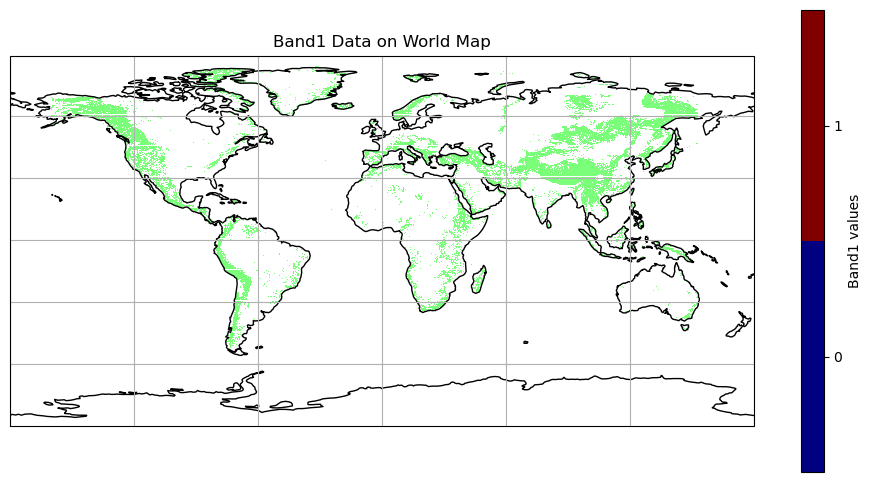

In [4]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Load the NetCDF file with 'Band1' data variable
dataset = ds
band1 = dataset['Band1']

# Create a figure and subplot with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))

# Plot the 'Band1' data variable with different colors for each value
cmap = plt.cm.get_cmap('jet', 3)  # 3 colors for 3 values
im = band1.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, add_colorbar=False)

# Set the colorbar to show the legend for the values
cbar = plt.colorbar(im, ax=ax, ticks=[0.5, 1.5], boundaries=[0, 1, 2], label='Band1 values')
cbar.ax.set_yticklabels(['0', '1'])

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Set plot title and labels
ax.set_title('Band1 Data on World Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [6]:
ds.Band1.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [28]:
ds['Band1'] = ds['Band1'].fillna(0)
ds['Band1']

<xarray.DataArray 'Band1' (lat: 1405, lon: 3239)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.0 -86.0 -83.0 -80.0 ... 83.41 83.51 85.0 88.0
  * lon      (lon) float64 -179.0 -176.0 -173.0 -170.0 ... 172.0 175.0 178.0
Attributes:
    long_name:     GDAL Band Number 1
    valid_range:   [  0 255]
    grid_mapping:  crs

In [33]:
ds['Band1'] = 1 - ds['Band1']
ds['Band1'].where(ds['Band1'] != 0)
np.unique(ds['Band1'])

array([nan], dtype=float32)

In [34]:
import numpy as np
np.unique(ds.Band1.values)

array([nan], dtype=float32)

/tmp/ipykernel_17360/2543111712.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet', 2)  # 2 colors for 2 values (1 and NaN)


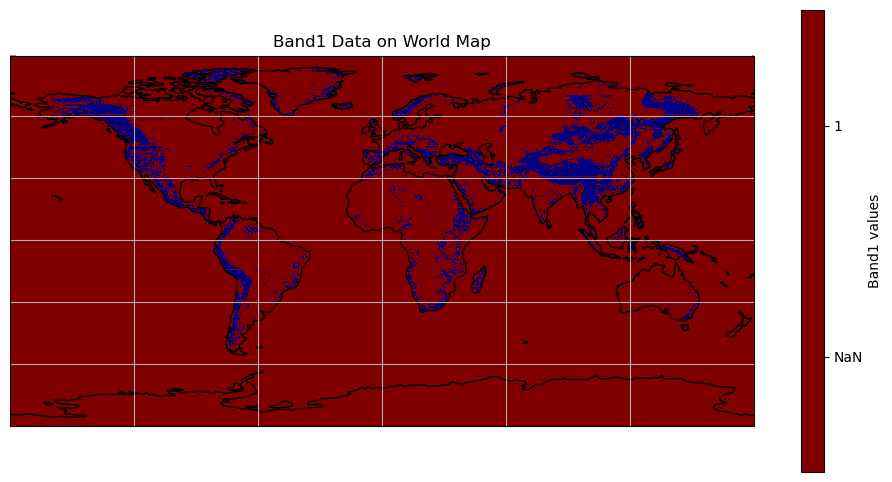

In [30]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Load the NetCDF file with 'Band1' data variable
dataset = ds
band1 = dataset['Band1']

# Create a figure and subplot with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))

# Plot the 'Band1' data variable with different colors for each value
cmap = plt.cm.get_cmap('jet', 2)  # 2 colors for 2 values (1 and NaN)
im = band1.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, add_colorbar=False)

# Set the colorbar to show the legend for the values
cbar = plt.colorbar(im, ax=ax, ticks=[0.5, 1.5], boundaries=[0, 1, 2], label='Band1 values')
cbar.ax.set_yticklabels(['NaN', '1'])

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Set plot title and labels
ax.set_title('Band1 Data on World Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [3]:
import xarray as xr
# Load the second NetCDF file with lat and lon coordinates
ds = xr.open_dataset('../output/mt_dis.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 1345, lon: 3119)
Coordinates:
  * lat      (lat) float64 -50.89 -50.79 -50.69 -50.59 ... 83.31 83.41 83.51
  * lon      (lon) float64 -159.8 -159.7 -159.6 -159.5 ... 151.8 151.9 152.0
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:           Area
    GDAL_STATISTICS_COVARIANCES:  0
    GDAL_STATISTICS_MAXIMUM:      1
    GDAL_STATISTICS_MEAN:         1
    GDAL_STATISTICS_MINIMUM:      1
    GDAL_STATISTICS_SKIPFACTORX:  1
    GDAL_STATISTICS_SKIPFACTORY:  1
    GDAL_STATISTICS_STDDEV:       0
    Conventions:                  CF-1.5
    GDAL:                         GDAL 3.7.0, released 2023/05/02
    history:                      Sun Jul 30 15:23:42 2023: GDAL CreateCopy( ...

In [4]:
import numpy as np
np.unique(ds.Band1.values)

array([ 1., nan], dtype=float32)

In [7]:
ds['Band1'] = ds['Band1'].fillna(0)

In [8]:
np.unique(ds.Band1.values)

array([0., 1.], dtype=float32)

In [9]:
ds['Band1'] = 1- ds['Band1']
np.unique(ds.Band1.values)

array([0., 1.], dtype=float32)

In [10]:
ds['Band1']

<xarray.DataArray 'Band1' (lat: 1345, lon: 3119)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -50.89 -50.79 -50.69 -50.59 ... 83.31 83.41 83.51
  * lon      (lon) float64 -159.8 -159.7 -159.6 -159.5 ... 151.8 151.9 152.0

In [11]:
# Replace 0 values with NaN in the entire Dataset
ds['Band1'] = ds['Band1'].where(ds['Band1'] != 0)
np.unique(ds.Band1.values)

array([ 1., nan], dtype=float32)

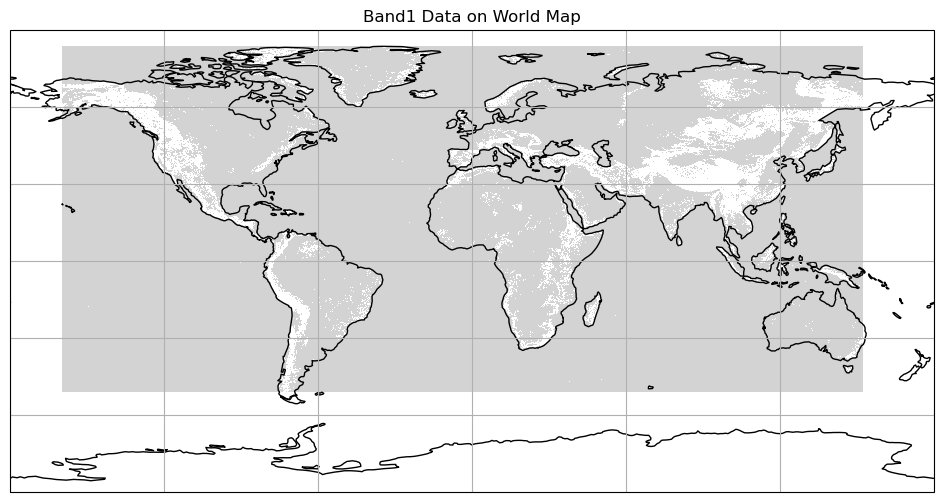

In [26]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Load the NetCDF file with 'Band1' data variable
dataset = ds
band1 = dataset['Band1']

# Create a custom colormap with lightgrey for 0 and None (transparent) for 1
cmap = plt.cm.colors.ListedColormap(['None', 'lightgrey'])

# Create a figure and subplot with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))

# Plot the 'Band1' data variable with the custom colormap
band1.plot.imshow(ax=ax, cmap=cmap, add_colorbar=False)

# Set the plot extent to cover the entire world
ax.set_global()

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Set plot title and labels
ax.set_title('Band1 Data on World Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the netCDF file
year = '2019'
dataset = xr.open_dataset('../data/wettasmin_W5E5v2.0_'+year+'.nc')
var = 'wet_temperature'

# Set the window size
window_size = 60

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset[var]

# Filter the dataset to the year 2001
year_dataset = dataset.sel(time=year)[var]

# Define the threshold range
thresholds = np.arange(-2, -11, -1)

band1 = ds['Band1']

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add land and ocean background
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Iterate over each threshold and plot filled contour regions
for i in range(len(thresholds)):
    threshold = thresholds[i]
    mask = year_dataset < threshold
    
    # Apply consecutive days condition
    consecutive_days = np.zeros_like(mask, dtype=int)
    consecutive_days[0] = mask[0].astype(int)
    
    for t in range(1, len(mask)):
        consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t-1] + 1)
    
    mask_consecutive = consecutive_days >= window_size
    
    mask_2d = np.any(mask_consecutive, axis=0)
    
    ax.contourf(lon, lat, mask_2d, levels=[0.5, 1], colors=[plt.cm.Blues(i / (len(thresholds) - 1)), 'none'], alpha=0.5, hatches=[None, '////'], transform=ccrs.PlateCarree(), zorder=1)

# Add country outlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

# Create a custom colormap with lightgrey for 0 and None (transparent) for 1
cmap = plt.cm.colors.ListedColormap(['None', 'lightgrey'])
# Plot the 'Band1' data variable with the custom colormap
band1.plot.imshow(ax=ax, cmap=cmap, add_colorbar=False, zorder=3)

# Plot water-stressed regions as a background
#ax.add_geometries(df['geometry'], crs=ccrs.PlateCarree(), facecolor='red', zorder=2)

# Plot the RiverAtlas data
#df.plot(color='red',ax=ax, zorder=2)

# Set the plot extent to cover the entire world
ax.set_global()
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=4)

# Set plot title and labels
ax.set_title('Mountain regions with suitable weather and discharge for artificial glaciers construction')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add map features
ax.coastlines()
ax.gridlines()

# Create a custom legend
threshold_labels = [str(threshold) + ' °C' for threshold in thresholds]
legend_handles = [mpatches.Rectangle((0, 0), 1, 1, fc=plt.cm.Blues(i / (len(thresholds) - 1)), alpha=0.5) for i in range(len(thresholds))]

ax.legend(legend_handles, threshold_labels + ['No discharge'], title='Thresholds', loc='lower left')

# Save the figure
plt.savefig("../figs/mt_dis_wetbulb_layer.png", bbox_inches="tight", dpi=300)

# Show the plot
plt.show()

NameError: name 'ds' is not defined